In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("Authors.csv", parse_dates=["DOB"], dayfirst=True)
df[["Author", "Title"]].to_numpy().tolist()

[['J.\u202fM.\u202fCoetzee', 'Disgrace'],
 ['Margaret Atwood', 'The Blind Assassin'],
 ['Peter Carey', 'True History of the Kelly Gang'],
 ['Yann Martel', 'Life of Pi'],
 ['DBC\u202fPierre', 'Vernon God Little'],
 ['Alan Hollinghurst', 'The Line of Beauty'],
 ['John Banville', 'The Sea'],
 ['Kiran Desai', 'The Inheritance of Loss'],
 ['Anne Enright', 'The Gathering'],
 ['Aravind Adiga', 'The White Tiger'],
 ['Hilary Mantel', 'Wolf Hall'],
 ['Howard Jacobson', 'The Finkler Question'],
 ['Julian Barnes', 'The Sense of an Ending'],
 ['Hilary Mantel', 'Bring Up the Bodies'],
 ['Eleanor Catton', 'The Luminaries'],
 ['Richard Flanagan', 'The Narrow Road to the Deep North'],
 ['Marlon James', 'A Brief History of Seven Killings'],
 ['Paul Beatty', 'The Sellout'],
 ['George Saunders', 'Lincoln in the Bardo'],
 ['Anna Burns', 'Milkman'],
 ['Margaret Atwood', 'The Testaments'],
 ['Bernardine Evaristo', 'Girl, Woman, Other'],
 ['Douglas Stuart', 'Shuggie Bain'],
 ['Damon Galgut', 'The Promise'],
 

In [16]:
df["Age"] = df.apply(lambda x:  (pd.to_datetime("01/06/" + str(x["Year"])) - x["DOB"]).days/365.25, axis=1)
df["Age Category"] = df["Age"].apply(lambda x: 0 if x <25 else 1 if x < 44 else 2 if x < 55 else 3)
df.head()

,Year,Author,Title,Gender,DOB,UK,Private,Oxbridge,White,Book Number,Setting,Age,Age Category
0,1999,J. M. Coetzee,Disgrace,M,1940-02-09,0,0,0,1,8,Present,58.907598,3
1,2000,Margaret Atwood,The Blind Assassin,F,1939-11-18,0,0,0,1,10,Past,60.134155,3
2,2001,Peter Carey,True History of the Kelly Gang,M,1943-05-07,0,1,0,1,7,Past,57.670089,3
3,2002,Yann Martel,Life of Pi,M,1963-06-25,0,1,0,1,4,Recent Past,38.535250,1
4,2003,DBC Pierre,Vernon God Little,M,1961-01-01,0,1,0,1,1,Present,42.012320,1


In [18]:
tmp = df[["Author", "Gender"]].drop_duplicates()
n, N = tmp[tmp["Gender"]=="M"].shape[0], tmp.shape[0]

l = n * np.log(n/N) + (N-n) * np.log((N-n)/N)
l_null = n * np.log(0.32) + (N-n) * np.log(0.68)
l, l_null, n/N, l - l_null

(-16.335454869842543, -21.7019108583217, 0.64, 5.3664559884791565)

In [19]:
tmp = df[["Author", "UK"]].drop_duplicates()
n, N = tmp[tmp["UK"]==1].shape[0], tmp.shape[0]

l = n * np.log(n/N) + (N-n) * np.log((N-n)/N)
l_null = n * np.log(0.84) + (N-n) * np.log(0.16)
l, l_null, n/N, l-l_null

(-15.671736439310656, -32.548711980879496, 0.32, 16.87697554156884)

In [20]:
tmp = df[["Author", "Private"]].drop_duplicates()
n, N = tmp[tmp["Private"]==1].shape[0], tmp.shape[0]

l = n * np.log(n/N) + (N-n) * np.log((N-n)/N)
l_null = n * np.log(0.16) + (N-n) * np.log(0.84)
l, l_null, n/N, l-l_null

(-17.14824500630932, -22.599343521258298, 0.44, 5.451098514948978)

In [21]:
tmp = df[["Author", "Oxbridge"]].drop_duplicates()
n, N = tmp[tmp["Oxbridge"]==1].shape[0], tmp.shape[0]

l = n * np.log(n/N) + (N-n) * np.log((N-n)/N)
l_null = n * np.log(0.03 * 0.79) + (N-n) * np.log(1-0.03*0.79)
l, l_null, n/N, l-l_null

(-12.510060588454696, -19.191108409215484, 0.2, 6.681047820760789)

In [22]:
tmp = df[["Author", "White"]].drop_duplicates()
n, N = tmp[tmp["White"]==1].shape[0], tmp.shape[0]

l = n * np.log(n/N) + (N-n) * np.log((N-n)/N)
l_null = n * np.log(0.85) + (N-n) * np.log(0.15)
l, l_null, n/N, l-l_null

(-13.77699820217432, -14.470579569773012, 0.76, 0.693581367598691)

In [23]:
tmp = df[["Author", "Age Category"]]
#n0  = tmp[tmp["Age Category"]==0].shape[0]#, tmp.shape[0]
n1  = tmp[tmp["Age Category"]==1].shape[0]#, tmp.shape[0]
n2  = tmp[tmp["Age Category"]==2].shape[0]#, tmp.shape[0]
n3  = tmp[tmp["Age Category"]==3].shape[0]#, tmp.shape[0]
N = n1 + n2 + n3

l = n1 * np.log(n1/N) + n2 * np.log(n2/N) + n3 * np.log(n3/N)
l_null = n1 * np.log(0.6/0.95) + n2 * np.log(0.2/0.95) + n3 * np.log(0.15/0.95) ### Account for dropping Gen Z
l, l_null, n1/N, n2/N, n3/N, l-l_null

(-28.25716458630989,
 -39.21809789712134,
 0.2222222222222222,
 0.2962962962962963,
 0.48148148148148145,
 10.960933310811448)

<BarContainer object of 3 artists>

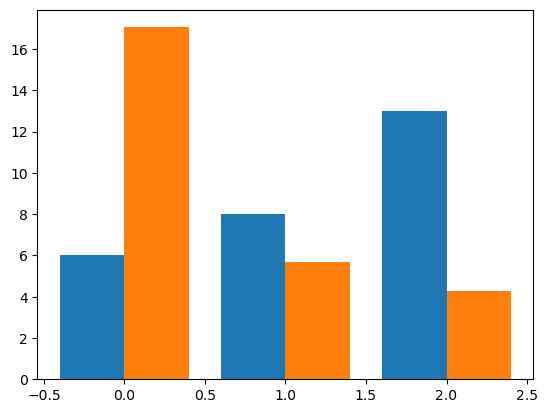

In [11]:
series1=[n1,n2,n3]
series2 = [0.6/0.95*N, 0.2/0.95*N,0.15/0.95*N,]
N = len(series1)

# Bar positions
ind = np.arange(N)  # the x locations for the groups
width = 0.4         # the width of the bars

# Plot side-by-side bars
plt.bar(ind - width/2, series1, width, label='Series 1')
plt.bar(ind + width/2, series2, width, label='Series 2')


In [27]:
df[(df["Title"]!="The Testaments") & (df["Book Number"]==4)].shape

(5, 13)

In [25]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import chi2

# Example data: number of tosses before stopping (i.e., first Head)
data = df[df["Title"]!="The Testaments"]["Book Number"]

# Log-likelihood function
def log_likelihood(params, data, special_toss=4):
    p, delta = params

    ll = 0
    for x in data:
        prob = 1.0
        for t in range(1, x):  # tails until x-1
            pt = p + delta if t == special_toss else p
            prob *= (1 - pt)
        pt = p + delta if x == special_toss else p
        prob *= pt  # head on toss x
        ll += np.log(prob)
    return ll

# Negative log-likelihood for minimize
def neg_ll(params, data):
    return -log_likelihood(params, data)

# Fit alternative model (estimate both p and delta)
alt_result = minimize(
    lambda params: -log_likelihood(params, data),
    x0=[0.14, 0.1],
    bounds=[(0.001, 0.6999), (1e-6, 0.3)]
)

p_alt, delta_alt = alt_result.x
logL_alt = log_likelihood([p_alt, delta_alt], data)

# Fit null model (delta = 0)
def null_neg_ll(p):
    return -log_likelihood([p[0], 0.0], data)

null_result = minimize(
    null_neg_ll,
    x0=[0.5],
    bounds=[(0.001, 0.999)]
)

p_null = null_result.x[0]
logL_null = log_likelihood([p_null, 0.0], data)

# Likelihood ratio test
LR = 2 * (logL_alt - logL_null)
p_value = 1 - chi2.cdf(LR, df=1)

# Output results
print(f"Null model:     p = {p_null:.4f}, logL = {logL_null:.2f}")
print(f"Alt model:      p = {p_alt:.4f}, delta = {delta_alt:.4f}, logL = {logL_alt:.2f}")
print(f"Log-likelihood ratio = {LR:.2f}")
print(f"p-value = {p_value:.4f}")
print(logL_alt - logL_null)

Null model:     p = 0.1711, logL = -69.55
Alt model:      p = 0.1567, delta = 0.1211, logL = -68.82
Log-likelihood ratio = 1.46
p-value = 0.2263
0.7319099843850694
